# Introduction

Outliers are data points that significantly differ from the majority of observations in a dataset. They can arise due to various reasons such as measurement errors, data entry mistakes, or genuine anomalies in the data. Detecting and handling outliers is crucial in data preprocessing to ensure the reliability and accuracy of statistical analyses and machine learning models.

In this section, we explore two machine learning techniques for outlier detection: Isolation Forest and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). 

1. **Isolation Forest**: Isolation Forest is an ensemble method that isolates outliers by randomly partitioning the data into subsets. It works efficiently even with high-dimensional datasets and is capable of identifying anomalies faster than traditional methods.

2. **DBSCAN**: DBSCAN is a density-based clustering algorithm that can also be used for outlier detection. It identifies outliers as points that do not belong to any cluster or are in low-density regions of the dataset.

We will demonstrate these methods using a synthetic dataset containing clusters of normal data points and artificially introduced outliers. Through visualizations, we will illustrate how Isolation Forest and DBSCAN detect outliers and differentiate them from normal data points. By the end of this section, you will understand how these techniques can be applied to real-world datasets to improve data quality and model performance.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

In [2]:
# Generate synthetic data
np.random.seed(42)
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))
data_with_outliers = np.concatenate([data, outliers])

In [3]:
# Convert data to a DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Feature1', 'Feature2'])

In [4]:
# Apply Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier_iso'] = iso_forest.fit_predict(df[['Feature1', 'Feature2']])

In [5]:
# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['outlier_dbscan'] = dbscan.fit_predict(df[['Feature1', 'Feature2']])

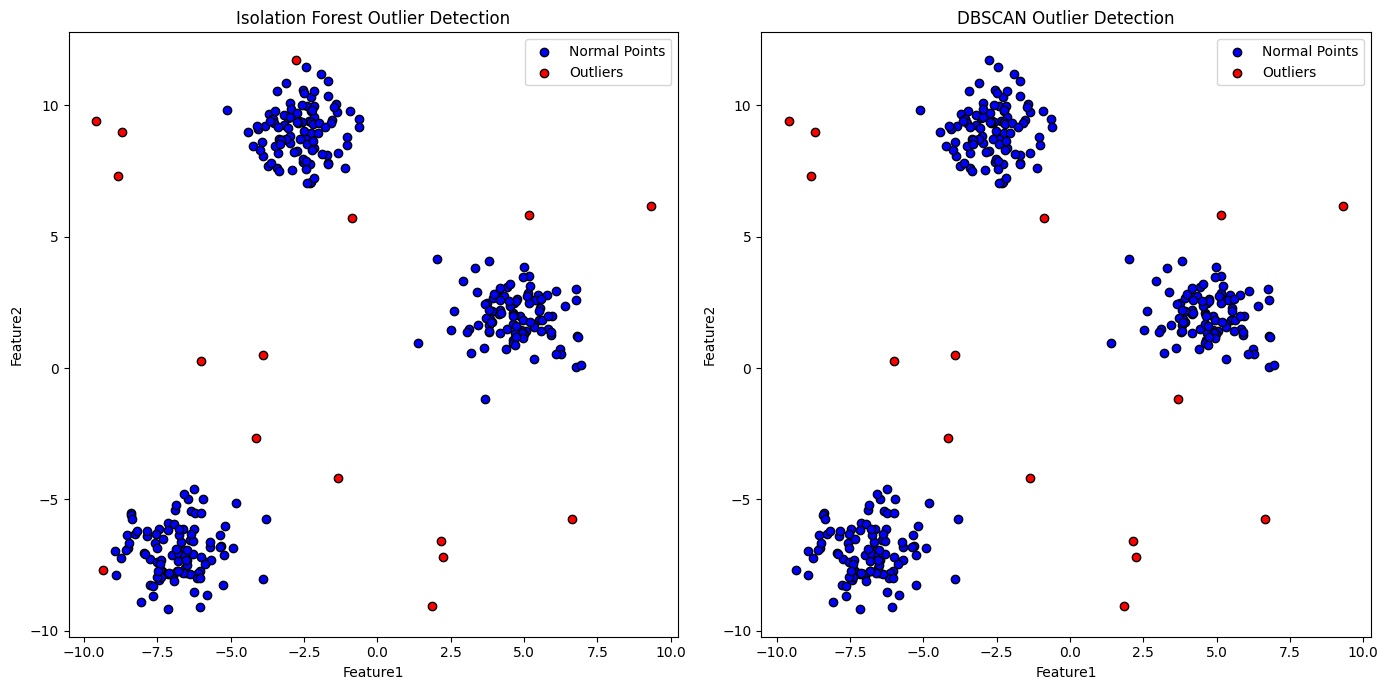

In [6]:
# Plotting results
plt.figure(figsize=(14, 7))

# Plot Isolation Forest results
plt.subplot(1, 2, 1)
normal_points_iso = df[df['outlier_iso'] == 1]
outlier_points_iso = df[df['outlier_iso'] == -1]
plt.scatter(normal_points_iso['Feature1'], normal_points_iso['Feature2'], c='blue', edgecolor='k', label='Normal Points')
plt.scatter(outlier_points_iso['Feature1'], outlier_points_iso['Feature2'], c='red', edgecolor='k', label='Outliers')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()

# Plot DBSCAN results
plt.subplot(1, 2, 2)
normal_points_dbscan = df[df['outlier_dbscan'] != -1]
outlier_points_dbscan = df[df['outlier_dbscan'] == -1]
plt.scatter(normal_points_dbscan['Feature1'], normal_points_dbscan['Feature2'], c='blue', edgecolor='k', label='Normal Points')
plt.scatter(outlier_points_dbscan['Feature1'], outlier_points_dbscan['Feature2'], c='red', edgecolor='k', label='Outliers')
plt.title('DBSCAN Outlier Detection')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Summary
print("Isolation Forest Outliers Detected:", (df['outlier_iso'] == -1).sum())
print("DBSCAN Outliers Detected:", (df['outlier_dbscan'] == -1).sum())

Isolation Forest Outliers Detected: 16
DBSCAN Outliers Detected: 15


## Conclusion

Outlier detection is a critical step in data preprocessing that ensures the robustness and reliability of analytical processes and machine learning models. In this section, we explored two machine learning techniques for outlier detection: Isolation Forest and DBSCAN.

- **Isolation Forest** proved effective in identifying outliers by isolating them in partitions of the dataset. It demonstrated robust performance even with high-dimensional data and was able to efficiently isolate anomalies.
  
- **DBSCAN** provided an alternative approach by clustering the majority of data points and marking outliers as points that did not fit into any cluster or were in low-density regions.

Through visualizations, we observed how these methods distinguished between normal data points and outliers in a synthetic dataset. The plots clearly illustrated the effectiveness of Isolation Forest and DBSCAN in handling outlier detection tasks.

In practical applications, choosing the appropriate outlier detection method depends on the dataset characteristics, such as dimensionality, distribution, and the nature of outliers present. By leveraging these techniques, data analysts and machine learning practitioners can improve the quality of datasets, leading to more accurate and reliable insights from their analyses.
